In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
CityData_csv = "data/city_data.csv"
RideData_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(CityData_csv)
ride_data = pd.read_csv(RideData_csv)

# Combine the data into a single dataset
City_andRide_df = pd.merge(ride_data, city_data, on="city")
City_andRide_df

# Display the data table for preview
City_andRide_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Convert the "fare" and "driver_count" columns to numeric so the data can be used
City_andRide_df["fare"] = pd.to_numeric(City_andRide_df["fare"])
City_andRide_df["driver_count"] = pd.to_numeric(City_andRide_df["driver_count"])
City_andRide_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


## Bubble Plot of Ride Sharing Data

In [3]:
# Group by city and create varaibles for number of rides (per city), average fare ($), and driver count.
groupby_city = City_andRide_df.groupby("city")
number_ofRides = groupby_city["ride_id"].count()
average_fare = groupby_city["fare"].mean()
number_ofDrivers = groupby_city["driver_count"].mean()

# Create variable to select city  and type data from city_data dataframe
city_type = city_data.set_index("city")["type"]

# Create a dataframe to hold values for bubble chart
Ride_Sharing_df = pd.DataFrame({
    "City Type": city_type,
    "Number of Rides": number_ofRides,
    "Average Fare": average_fare,
    "Number of Drivers": number_ofDrivers
})

Ride_Sharing_df.head()

# Create variable to seperate data by city type conditional 
Urban_df = Ride_Sharing_df[Ride_Sharing_df["City Type"] == "Urban"]
Suburban_df = Ride_Sharing_df[Ride_Sharing_df["City Type"] == "Suburban"]
Rural_df = Ride_Sharing_df[Ride_Sharing_df["City Type"] == "Rural"]

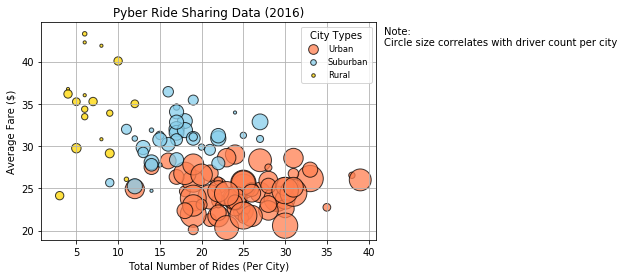

In [4]:
# Obtain the x and y coordinates for each of the three city types
x_Urban = Urban_df["Number of Rides"]
y_Urban = Urban_df["Average Fare"]
z_Urban = Urban_df["Number of Drivers"]

x_Suburban = Suburban_df["Number of Rides"]
y_Suburban = Suburban_df["Average Fare"]
z_Suburban = Suburban_df["Number of Drivers"]

x_Rural = Rural_df["Number of Rides"]
y_Rural = Rural_df["Average Fare"]
z_Rural = Rural_df["Number of Drivers"]

# Build the scatter plots for each city types
p1 = plt.scatter(x_Urban, y_Urban, s=10*z_Urban, c="coral", alpha=0.75, edgecolor="black", linewidth=1, label="Urban")
p2 = plt.scatter(x_Suburban, y_Suburban, s = 10*z_Suburban, c="skyblue", alpha=0.75, edgecolor="black", linewidth=1, label="Suburban")
p3 = plt.scatter(x_Rural, y_Rural, s = 10*z_Rural, c="gold", alpha=0.75, edgecolor="black", linewidth=1, label="Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(handles=[p1, p2, p3], title="City Types", loc="upper right", fontsize="small", markerscale=0.5, fancybox=True)

# Incorporate a text label regarding circle size
plt.figtext(0.92, 0.8, r"Note:"
           "\n"  # Newline: the backslash is interpreted as usual
           r"Circle size correlates with driver count per city")
# Save Figure

plt.savefig("../Images/Pyber_RideSharing.png")


## Total Fares by City Type

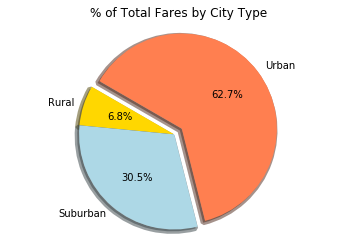

In [5]:
# Calculate Type Percents
groupby_type = City_andRide_df.groupby("type")
total_fares = 100*(groupby_type["fare"].sum()/City_andRide_df["fare"].sum())

# Build Pie Chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Rural", "Suburban", "Urban"
sizes = total_fares
colors = ["gold", "lightblue", "coral"]
explode = (0, 0, 0.1)  # only "explode" the 3rd slice (i.e. "Urban")

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', wedgeprops={"linewidth": -5},
        shadow=True, startangle=150)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Pyber_TotalFares.png")

## Total Rides by City Type

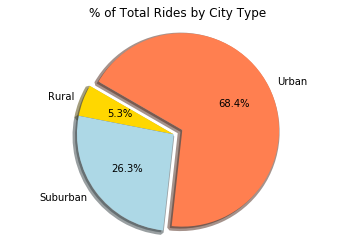

In [6]:
# Calculate Ride Percents
groupby_type = City_andRide_df.groupby("type")
total_rides = 100*(groupby_type["ride_id"].count()/City_andRide_df["ride_id"].count())

# Build Pie Chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Rural", "Suburban", "Urban"
sizes = total_rides
colors = ["gold", "lightblue", "coral"]
explode = (0, 0, 0.1)  # only "explode" the 3rd slice (i.e. "Urban")

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', wedgeprops={"linewidth": -5},
        shadow=True, startangle=150)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Pyber_TotalRides.png")

## Total Drivers by City Type

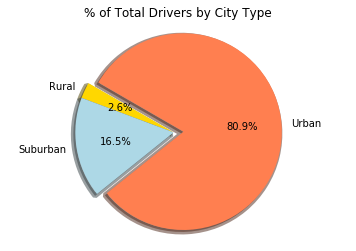

In [7]:
# Calculate Driver Percents
groupby_type = city_data.groupby("type")
#total_drivers = 100*(groupby_type["driver_count"].mean()/city_data["driver_count"].sum())
total_drivers = 100*(groupby_type["driver_count"].sum()/city_data["driver_count"].sum())

# Build Pie Charts
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Rural", "Suburban", "Urban"
sizes = total_drivers
colors = ["gold", "lightblue", "coral"]
explode = (0, 0, 0.1)  # only "explode" the 3rd slice (i.e. "Urban")

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', wedgeprops={"linewidth": -5},
        shadow=True, startangle=150)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/Pyber_TotalDrivers.png")

# Three observable trends based on the data:
#1)
The three pie charts show that there is a disproportionate number of drivers in the urban cities. The number of drivers in the urban cities account for almost 81% of all drivers, but only account for 62.7% and 68.4% of the total fares and total rides respectively.
#2)
The data shown on the bubble chart is consistent with the premise of supply and demand. There are significantly more drivers in the urban cities, where the fares are relatively lower. Conversely, there are significantly less drivers in the rural cities; and thereby, the average fares appear to be higher.
#3)
There may be a correlation between distance and the average fares. However, the ride distances were not provided in the data, but could be a factor in the average rural city fares being higher.  It is reasonable to assume that the average urban ride distances were shorter, but not able to confirm with the data provided. 